Going to make a plot showing examples Knn-cdfs in one panel and the emu accuracies and sim cov in another. hopefully thats clear. 

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set()
#import matplotlib.colors as colors
sns.set_palette('deep')
plt.rcParams.update({'font.size': 18})

In [3]:
import numpy as np
from pearce.emulator import LemonPepperWet
from glob import  glob
from os import path

 /u/ki/swmclau2/.conda/envs/hodemulator/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning:numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.


In [12]:
r_bins = np.logspace(-0.3, 2, 21)
rbc = (r_bins[1:]+r_bins[:-1])/2.0

In [5]:
palette = sns.color_palette()
model_color_map = {'k=1':palette[1], 'k=2':palette[2], 'k=4':palette[3], 'k=8':palette[4]}

In [6]:
ks = [1,2,4,8]
models = ['k=%d'%k for k in ks]

In [9]:
mock_dir = '/u/ki/swmclau2/Git/pearce/bin/mock_measurements/'
cov_dir = '/u/ki/swmclau2/Git/pearce/bin/covmat/'
emu_dir = '/u/ki/swmclau2/Git/pearce/bin/optimization/'

In [11]:
meas = []
sim_covs = []
emu_covs = []
for k in ks:
    meas.append(np.load(path.join(mock_dir, 'testbox_1_1_knn_%d_cdf.npy'%k)))
    sim_covs.append(np.load(path.join(cov_dir, 'knn_%d_cdf_sim_covmat.npy'%k)))
    emu_covs.append(np.load(path.join(emu_dir, 'knn_%d_cdf_hsab_emu_cov_lpw.npy'%k)))                

In [32]:
def make_peaked_cdf(cdf):
    gt_half = cdf>0.5
    outputs = np.zeros_like(cdf)
    outputs[~gt_half] = cdf[~gt_half]
    outputs[gt_half] = 1-cdf[gt_half]
    return outputs

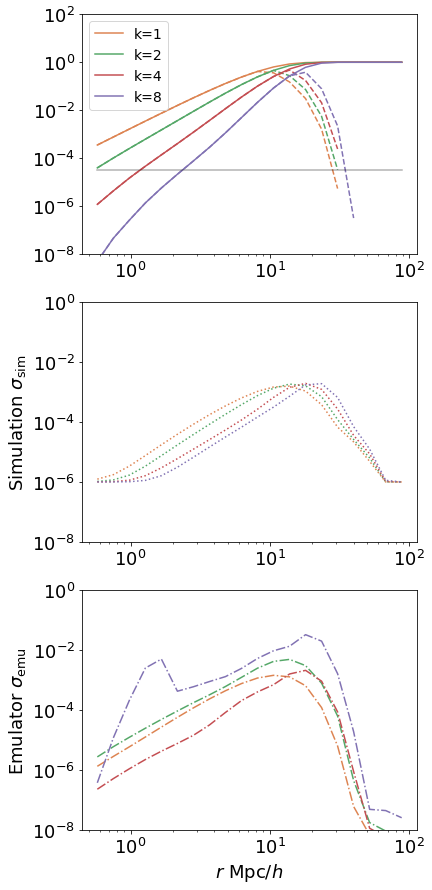

In [62]:
fig, axes = plt.subplots(3,1, figsize = (6,15))
for k,m,s,e in zip(ks, meas, sim_covs, emu_covs):
    c = model_color_map['k=%d'%k]
    axes[0].plot(rbc, m, color = c, label = 'k=%d'%k)
    axes[0].plot(rbc, make_peaked_cdf(m), color = c, ls = '--')
    axes[1].plot(rbc, np.sqrt(np.diag(s)), color = c, ls = ':')
    axes[2].plot(rbc, np.sqrt(np.diag(e)), color = c, ls = '-.')

axes[0].plot(rbc, np.ones_like(m)*np.sqrt(1e-9), color = 'k', alpha = 0.3)

axes[0].loglog();
axes[0].set_ylim([1e-8, 100])
axes[0].legend(loc='upper left',prop={'size': 14})
axes[1].loglog();#set_xscale('log')
axes[1].set_ylim([1e-8, 1e0])
#axes[1].text(0.3,1e-2, 'Simulation Unc.')
axes[2].loglog();#set_xscale('log')
axes[2].set_ylim([1e-8, 1e0])
axes[2].set_xlabel(r'$r$ Mpc/$h$')
axes[1].set_ylabel(r'Simulation $\sigma_{\rm{sim}}$')
axes[2].set_ylabel(r'Emulator $\sigma_{\rm{emu}}$')
plt.savefig('knn_error.pdf', format='pdf', bbox_inches='tight')